In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 1. # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.5 # 凡例の線と文字の距離の長さ

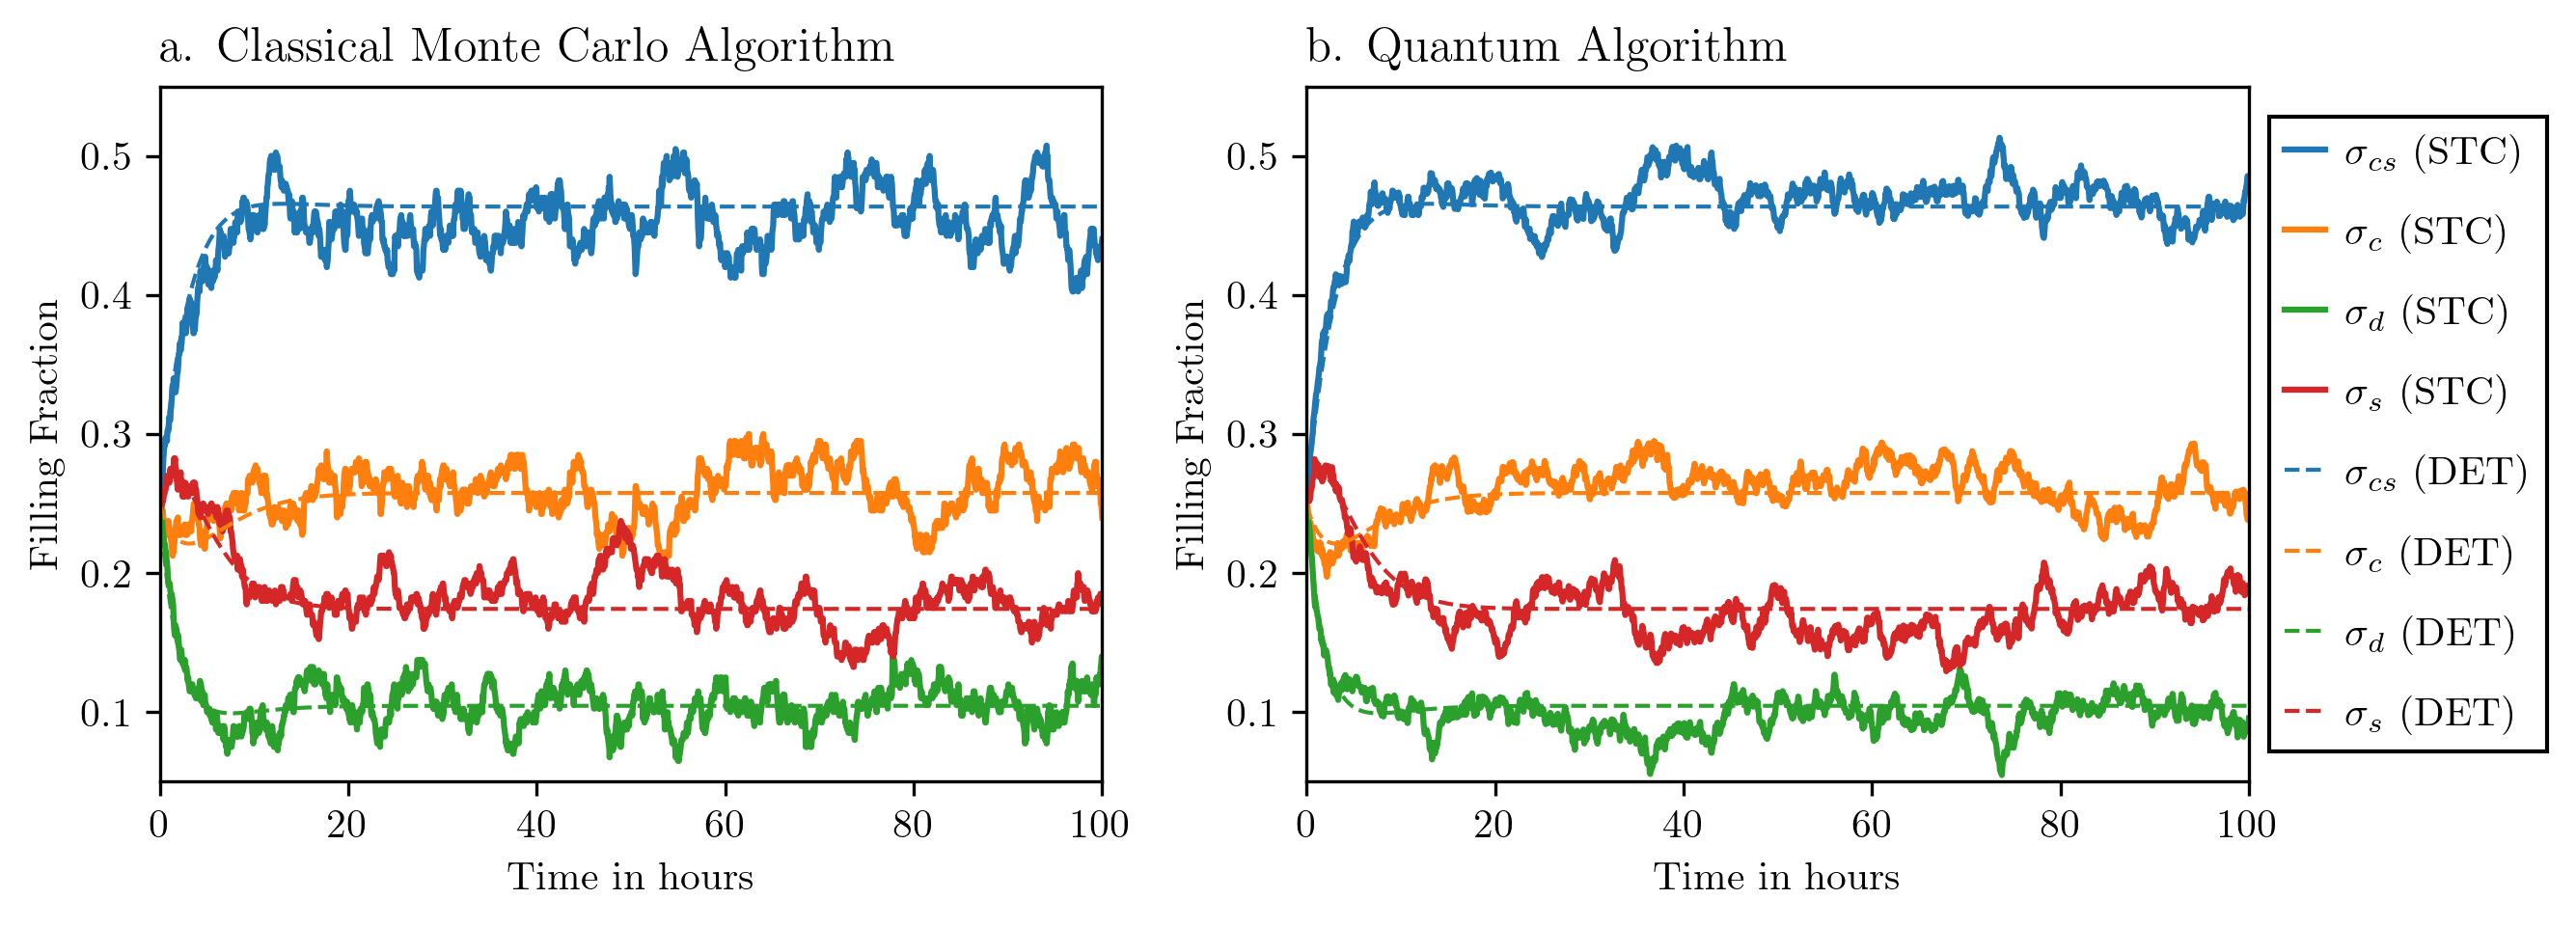

In [7]:
# plt.rcParams["font.size"] = 12
gq = np.loadtxt('results/qsout4e+04.txt', delimiter='\t')
gd = np.loadtxt('results/digout.txt')
gc = np.loadtxt('results/mcout400.txt')
x = np.linspace(0,100,2000)
fig = plt.figure(figsize=(9,3.3),dpi=300)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for ax, g, title in [ax1,gc,"a. Classical Monte Carlo Algorithm"],[ax2,gq,"b. Quantum Algorithm"]:
	sigma_cs = g.T[0]
	sigma_c = g.T[1]
	sigma_d = g.T[2]
	sigma_s = g.T[3]
	ax.plot(x,sigma_cs,label=r"$\sigma_{cs}$ (STC)")
	ax.plot(x,sigma_c,label=r"$\sigma_{c}$ (STC)")
	ax.plot(x,sigma_d,label=r"$\sigma_{d}$ (STC)")
	ax.plot(x,sigma_s,label=r"$\sigma_{s}$ (STC)")
	ax.plot(x,gd.T[0],"--",color="tab:blue",linewidth=1,label=r"$\sigma_{cs}$ (DET)")
	ax.plot(x,gd.T[1],"--",color="tab:orange",linewidth=1,label=r"$\sigma_{c}$ (DET)")
	ax.plot(x,gd.T[2],"--",color="tab:green",linewidth=1,label=r"$\sigma_{d}$ (DET)")
	ax.plot(x,gd.T[3],"--",color="tab:red",linewidth=1,label=r"$\sigma_{s}$ (DET)")
# ax.hlines(0.4636,0,100,linestyles="--",colors="tab:blue")
# ax.hlines(0.2576,0,100,linestyles="--",colors="tab:orange")
# ax.hlines(0.1046,0,100,linestyles="--",colors="tab:green")
# ax.hlines(0.1743,0,100,linestyles="--",colors="tab:red")
	ax.set_xlim(0,100)
	ax.set_ylim(0.05,0.55)
	ax.set_xlabel("Time in hours")
	ax.set_ylabel("Filling Fraction")
	ax.set_title(title,loc="left")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.25, 0.5, 0.5))
plt.tight_layout()
plt.savefig("fig/compare_mc_qa.eps")
plt.show()

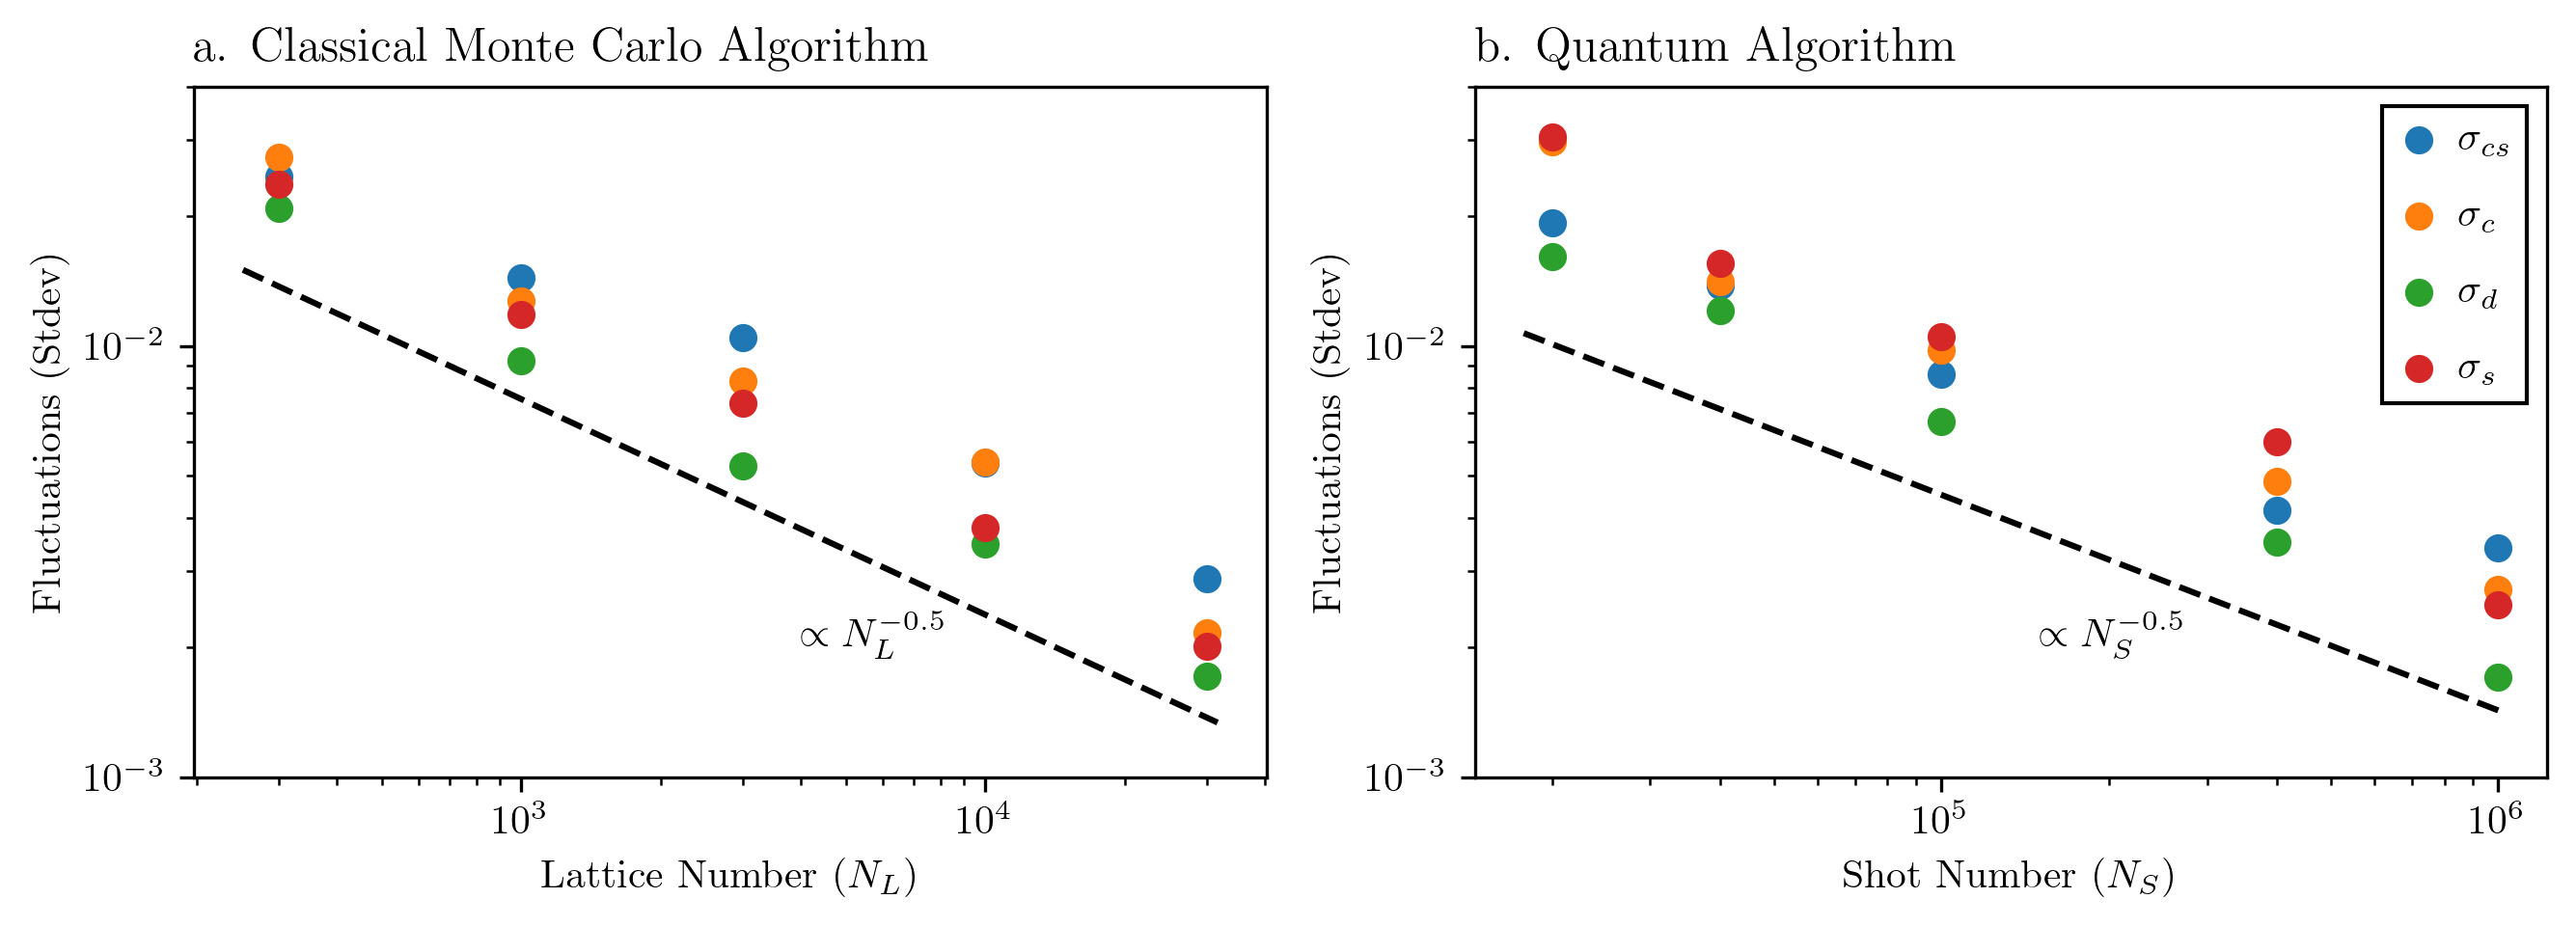

In [ ]:
gd = np.loadtxt('results/digout.txt')
fig = plt.figure(figsize=(9,3.3),dpi=300)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_xscale('log')
ax1.set_yscale('log')
x1 = []
dccs = []
dcc = []
dcd = []
dcs = []
for i in [300,1000,3000,10000,30000]:
  gc = np.loadtxt(f'results/mcout{i}.txt')
  dccs += [statistics.stdev(gc[:,0]-gd[:,0])]
  dcc += [statistics.stdev(gc[:,1]-gd[:,1])]
  dcd += [statistics.stdev(gc[:,2]-gd[:,2])]
  dcs += [statistics.stdev(gc[:,3]-gd[:,3])]
  x1 += [i]
ax1.scatter(x1,dccs)
ax1.scatter(x1,dcc)
ax1.scatter(x1,dcd)
ax1.scatter(x1,dcs)

# N^-1/2
N = np.logspace(2.4, 4.5, 100)
ax1.plot(N,N**(-0.5)/4.2,'k--')
ax1.text(4000,0.002,'$\\propto N_L^{-0.5}$')

linear1_cs = np.polyfit(np.log10(x1),np.log10(dccs),1)
log_y_pred_cs = linear1_cs[1] + linear1_cs[0] * np.log10(x1)
linear1_c = np.polyfit(np.log10(x1),np.log10(dcc),1)
log_y_pred_c = linear1_c[1] + linear1_c[0] * np.log10(x1)
linear1_d = np.polyfit(np.log10(x1),np.log10(dcd),1)
log_y_pred_d = linear1_d[1] + linear1_d[0] * np.log10(x1)
linear1_s = np.polyfit(np.log10(x1),np.log10(dcs),1)
log_y_pred_s = linear1_s[1] + linear1_s[0] * np.log10(x1)
# ax1.plot(10**np.log10(x1), 10**log_y_pred_cs)
# ax1.plot(10**np.log10(x1), 10**log_y_pred_c)
# ax1.plot(10**np.log10(x1), 10**log_y_pred_d)
# ax1.plot(10**np.log10(x1), 10**log_y_pred_s)

ax1.set_ylim(1e-3,4e-2)
ax1.set_xlabel("Lattice Number ($N_L$)")
ax1.set_ylabel("Fluctuations (Stdev)")
ax1.set_title("a. Classical Monte Carlo Algorithm",loc="left")

ax2.set_xscale('log')
ax2.set_yscale('log')
x2 = []
dqcs = []
dqc = []
dqd = []
dqs = []
for i in [2e4,4e4,1e5,4e5,1e6]:
  gq = np.loadtxt(f'results/qsout{i:.0e}.txt', delimiter='\t')
  dqcs += [statistics.stdev(gq[:,0]-gd[:,0])]
  dqc += [statistics.stdev(gq[:,1]-gd[:,1])]
  dqd += [statistics.stdev(gq[:,2]-gd[:,2])]
  dqs += [statistics.stdev(gq[:,3]-gd[:,3])]
  x2 += [i]
ax2.scatter(x2,dqcs,label=r"$\sigma_{cs}$")
ax2.scatter(x2,dqc,label=r"$\sigma_{c}$")
ax2.scatter(x2,dqd,label=r"$\sigma_{d}$")
ax2.scatter(x2,dqs,label=r"$\sigma_{s}$")
# N^-1/2
N = np.logspace(4.25, 6.0, 100)
ax2.plot(N,N**(-0.5)/0.7,'k--')
ax2.text(150000,0.002,'$\\propto N_S^{-0.5}$')

ax2.set_ylim(1e-3,4e-2)
ax2.set_xlabel("Shot Number ($N_S$)")
ax2.set_ylabel("Fluctuations (Stdev)")
ax2.set_title("b. Quantum Algorithm",loc="left")
ax2.legend()
plt.tight_layout()
# plt.savefig('fig/variance_mc_qa.eps')
plt.show()